In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score,KFold
from scipy.stats import skew
import warnings
warnings.filterwarnings('ignore')


In [38]:
red = pd.read_csv('/content/winequality-red.csv', sep=';')
white = pd.read_csv('/content/winequality-white.csv', sep=';')

In [43]:
red['type'] = 'red'
white['type'] = 'white'
wine = pd.concat([red, white],ignore_index=True)
wine['type'] = wine['type'].map({'red':0, 'white':1}) # red = 0 white = 1
wine = wine.sample(frac=1 , random_state=42).reset_index(drop=True)

In [44]:
wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.17,0.74,12.8,0.045,24.0,126.0,0.99420,3.26,0.38,12.2,8,1
1,7.7,0.64,0.21,2.2,0.077,32.0,133.0,0.99560,3.27,0.45,9.9,5,0
2,6.8,0.39,0.34,7.4,0.020,38.0,133.0,0.99212,3.18,0.44,12.0,7,1
3,6.3,0.28,0.47,11.2,0.040,61.0,183.0,0.99592,3.12,0.51,9.5,6,1
4,7.4,0.35,0.20,13.9,0.054,63.0,229.0,0.99888,3.11,0.50,8.9,6,1
5,7.2,0.53,0.14,2.1,0.064,15.0,29.0,0.99323,3.35,0.61,12.1,6,0
6,7.5,0.27,0.31,17.7,0.051,33.0,173.0,0.99900,3.09,0.64,10.2,5,1
7,6.8,0.11,0.27,8.6,0.044,45.0,104.0,0.99454,3.20,0.37,9.9,6,1
8,9.0,0.44,0.49,2.4,0.078,26.0,121.0,0.99780,3.23,0.58,9.2,5,0
9,7.1,0.23,0.30,2.6,0.034,62.0,148.0,0.99121,3.03,0.56,11.3,7,1


## Basic EDA

In [45]:
# Check the shape of the DataFrame
print("Shape of the DataFrame:", wine.shape)

# Get information about the DataFrame
print("\nInfo of the DataFrame:")
wine.info()

# Get descriptive statistics
print("\nDescriptive statistics of the DataFrame:")
display(wine.describe())

Shape of the DataFrame: (6497, 13)

Info of the DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB

Descriptive sta

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.753886
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,1.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,1.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


## Distribution of Quality

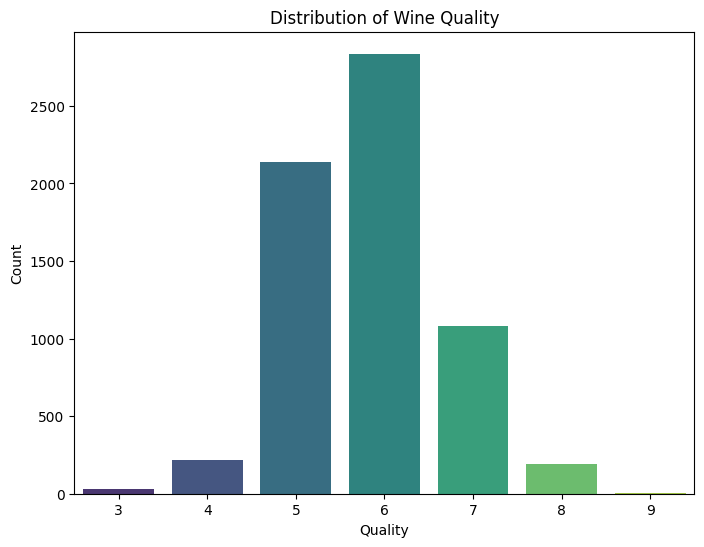

In [46]:
# Visualize the distribution of the target variable 'quality'
plt.figure(figsize=(8, 6))
sns.countplot(x='quality', data=wine, palette='viridis')
plt.title('Distribution of Wine Quality')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

## Check for Skewness

In [49]:
# Check for skewness in the numerical features
numeric_features = wine.drop(columns=['quality'])
skewness = numeric_features.apply(skew).sort_values(ascending = False)
print("\nSkewness of numerical features:")
display(skewness)


Skewness of numerical features:


,0
chlorides,5.398581
sulphates,1.796855
fixed acidity,1.722892
volatile acidity,1.494751
residual sugar,1.435073
free sulfur dioxide,1.219784
alcohol,0.565587
density,0.503485
citric acid,0.471622
pH,0.386749


## Apply Log Transform to Skewed Features

In [51]:
# Apply log transform to highly skewed features (skewness > 0.5)
for col in ['chlorides', 'sulphates', 'fixed acidity', 'volatile acidity', 'residual sugar', 'free sulfur dioxide']:
    # Add a small constant to handle zero values before applying log transform
    wine[col] = np.log1p(wine[col])

print("Skewness after log transform:")
display(wine.drop(columns=['quality']).apply(lambda x: skew(x)).sort_values(ascending=False))

Skewness after log transform:


,0
chlorides,3.855007
volatile acidity,0.899142
sulphates,0.781111
fixed acidity,0.764949
alcohol,0.565587
density,0.503485
citric acid,0.471622
pH,0.386749
residual sugar,0.164724
total sulfur dioxide,-0.001177


## Split data

Split the dataset into training, validation, and testing sets.


In [57]:
X = wine.drop('quality', axis=1)
y = wine['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print("Shape of training set:", X_train.shape)

print("Shape of testing set:", X_test.shape)

Shape of training set: (5197, 12)
Shape of testing set: (1300, 12)


## Train model

Train a Random Forest Classifier on the training data.


In [58]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## Evaluate model

Evaluate the trained model on the validation set.


In [59]:
from sklearn.metrics import accuracy_score

y_pred_val = model.predict(X_test)
mse_val = mean_squared_error(y_test, y_pred_val)
accuracy_val = accuracy_score(y_test, y_pred_val)

print(f"Mean Squared Error on validation set: {mse_val}")
print(f"Accuracy on validation set: {accuracy_val}")

Mean Squared Error on validation set: 0.44153846153846155
Accuracy on validation set: 0.6876923076923077


## K-fold cross-validation

Perform K-Fold cross-validation on the training data using the Random Forest Classifier.


In [55]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
rf_model = RandomForestClassifier(random_state=42)
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=kf, scoring='accuracy')

print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", np.mean(cv_scores))

Cross-validation scores: [0.66153846 0.66538462 0.67757459 0.65736285 0.68334937]
Mean cross-validation score: 0.6690419782335085


## Evaluate on test set


Evaluate the final model on the test set.


In [60]:
y_pred_test = model.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred_test)
accuracy_test = accuracy_score(y_test, y_pred_test)

print(f"Mean Squared Error on test set: {mse_test}")
print(f"Accuracy on test set: {accuracy_test}")

Mean Squared Error on test set: 0.44153846153846155
Accuracy on test set: 0.6876923076923077
